# 머신러닝을 통한 선형회귀

### Step 1. Data Generating ### 

In [1]:
import numpy as np
x = 2* np.random.rand(100, 1)
y = 4+5*x + np.random.randn(100, 1)
y = np.ravel(y)

In [2]:
print(x[0:5])
print(y[0:5])

[[1.99326306]
 [1.68712389]
 [1.29739075]
 [0.73015181]
 [0.72561583]]
[14.25193261 12.7338964  10.94793161  8.39380681  7.19886554]


### Step 2. Training, Test 7:3 또는 8:2로 나눔

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True)

In [4]:
print(len(x_train))
print(len(x_test))

80
20


### Step 3. Optimization by Stochastic Gradient Descent

In [5]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 100, learning_rate = "constant",
                       eta0 = 0.001, verbose = 2, penalty = None,
                       n_iter_no_change = 100, warm_start = True)

In [6]:
sgd_reg.fit(x_train, y_train)

-- Epoch 1
Norm: 0.76, NNZs: 1, Bias: 0.669684, T: 80, Avg. loss: 38.625355
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.41, NNZs: 1, Bias: 1.234217, T: 160, Avg. loss: 27.643939
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.95, NNZs: 1, Bias: 1.711216, T: 240, Avg. loss: 19.817593
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 2.41, NNZs: 1, Bias: 2.114038, T: 320, Avg. loss: 14.231637
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.80, NNZs: 1, Bias: 2.452488, T: 400, Avg. loss: 10.249781
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 3.13, NNZs: 1, Bias: 2.737379, T: 480, Avg. loss: 7.417685
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 3.41, NNZs: 1, Bias: 2.978446, T: 560, Avg. loss: 5.400197
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 3.65, NNZs: 1, Bias: 3.179787, T: 640, Avg. loss: 3.964011
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 3.84, NNZs: 1, Bias: 3.350033, T: 720, Avg. loss: 2.941480
Total training time: 0.02 second

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=100,
       n_iter=None, n_iter_no_change=100, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=2, warm_start=True)

In [7]:
import sys
from io import StringIO
string_list = sys.stdout
sys.stdout = mystdout = StringIO()

### fitting ###
sgd_reg.fit(x_train, y_train)

sys.stdout = string_list
loss_history = mystdout.getvalue()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [8]:
loss_list = []
sequence = []
for seq, line in enumerate(loss_history.split("\n")):
    # loss를 한 5씩 끊어서 보고 싶음
    if (seq + 1) % 5 == 0:
        
        if(len(line.split("loss: ")) == 1):
            continue
        
        sequence.append(((seq+1) +2)/3+1)
        loss_list.append(float(line.split("loss: ")[-1]))

In [9]:
loss_list[0:5]

[0.391505, 0.391348, 0.391259, 0.391185, 0.391104]

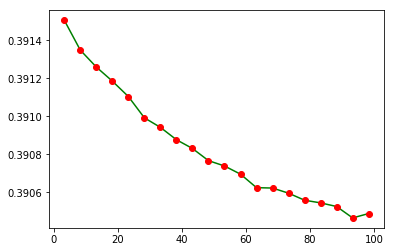

In [11]:
### plotting ###
import matplotlib.pyplot as plt
plt.plot(sequence, loss_list, 'g-')
plt.plot(sequence, loss_list, 'ro')

In [12]:
# 상수항 #
print(sgd_reg.coef_)
# 회귀 계수 #
print(sgd_reg.intercept_)

[5.10973551]
[4.0559978]


In [13]:
### 회귀 직선 ###

In [14]:
X = np.linspace(0, 2, 10)
Y = sgd_reg.coef_ * X + sgd_reg.intercept_

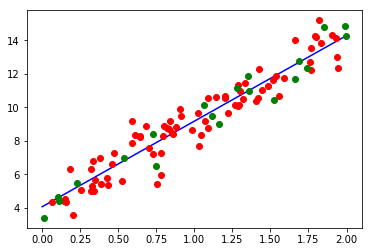

In [15]:
### Training, Test & 회귀 직선 된것도 포함 ### 
plt.plot(X, Y, 'b-')
plt.plot(x_train, y_train, 'ro')
plt.plot(x_test, y_test, 'go')
plt.show()


### Step 4. 성능평가

In [16]:
def MSE(regression_y, real_y):
    n=len(real_y)
    sum_val = 0
    for i in range(n):
        diff_square = (real_y[i][0] - regression_y[i][0])**2
        sum_val += diff_square
    mse = (sum_val/n)
    return mse

In [17]:
regression_y = sgd_reg.coef_ * np.array(x_test) + sgd_reg.intercept_
real_y = y_test.reshape(len(y_test), 1)

In [19]:
MSE_val = MSE(regression_y, real_y)
print(MSE_val)

0.5338254187712482


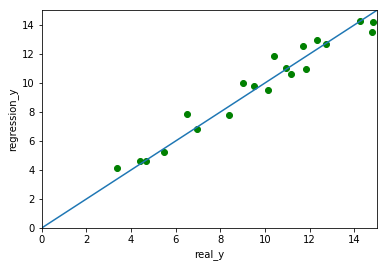

In [21]:
plt.plot(real_y, regression_y, 'go')
X = np.linspace(0, 15, 5)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.plot(X, X)
plt.xlabel("real_y")
plt.ylabel("regression_y")
plt.show()